In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torchvision, torch

In [3]:
import sys, os
sys.path.insert(0,"../torchxrayvision/")
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
import glob
import numpy as np
import skimage, skimage.filters
%matplotlib inline
import captum, captum.attr
import torch, torch.nn
import pickle
import attribution
import pandas as pd
import datasets
import shutil

In [5]:
toplot = glob.glob("/scratch/users/joecohen/output/*resnet*-ae*test4*metr*")
toplot

['/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet50-2-ae_test4-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test4_elastic-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test4-metrics.pkl']

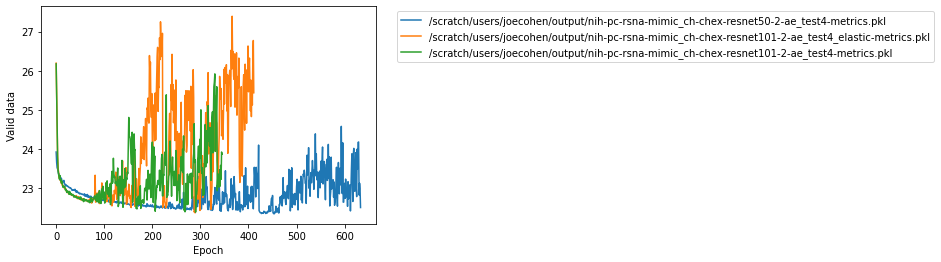

In [6]:
font = {'size'   : 10}
plt.rc('font', **font)

for to in toplot:
    results = pickle.load(open(to,"rb"))
    validauc = [np.log(-r["validauc"]) for r in results]
    plt.plot(validauc, label=to);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.ylabel("Valid data");
plt.xlabel("Epoch");

In [4]:
dmerge = datasets.get_data("nih")

NIH_Dataset num_samples=67310 views=['PA'] data_aug=None


In [5]:
#ae = xrv.autoencoders.ResNetAE(weights="101-elastic").cuda()

In [6]:
model = xrv.models.DenseNet(weights="all").cuda()

In [8]:
for_eval = [
            "Cardiomegaly",
            'Mass',
            'Nodule', 
            "Atelectasis",
            "Effusion",
            "Lung Opacity",
            ]

In [ ]:
k = pd.DataFrame()
for e in range(50,400, 5):
    ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae*test2-e{}.pt".format(e)
    #ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae*test2-elastic-e{}.pt".format(e)
    ae_file = glob.glob(ae_file)[0]
    print(ae_file)
    ae = torch.load(ae_file, map_location=torch.device('cpu')).cuda()

    a = attribution.run_eval("Cardiomegaly", dmerge, model, ae, limit = 40, to_eval=["latentshift-max"], compute_recon=True)
    a["e"] = e
    a["model"] = str(model)
    k = k.append(a)
    print(e)
    

    

In [16]:
#pickle.dump(k, open("iou-mae.pkl", "bw"))

In [6]:
k = pickle.load(open("iou-mae.pkl", "rb"))

In [7]:
k["mae"]

0     46.097027
1     28.574139
2     24.319435
3     50.195221
4     35.878456
        ...    
36    34.787128
37    34.494194
38    35.589554
39    30.121883
40    37.319290
Name: mae, Length: 2583, dtype: float64

In [8]:
kk = k.groupby(["e"]).mean().reset_index()

In [9]:
kk

,e,iou,precision,recall,mse,mae,idx
0,50,0.308045,0.465099,0.465099,4794.311711,45.992158,16759.243902
1,55,0.317854,0.477441,0.477441,4790.732583,46.758993,16759.243902
2,60,0.305610,0.461825,0.461825,4816.487525,47.415652,16759.243902
3,65,0.297931,0.454251,0.454251,4633.930646,46.222596,16759.243902
4,70,0.310373,0.469081,0.469081,4885.567847,48.072290,16759.243902
...,...,...,...,...,...,...,...
58,340,0.293707,0.449612,0.449612,2678.473401,34.757931,16759.243902
59,345,0.299062,0.456848,0.456847,2759.168624,35.878440,16759.243902
60,350,0.297139,0.453448,0.453448,2811.379893,36.576320,16759.243902
61,355,0.295314,0.452098,0.452098,2783.907075,35.577684,16759.243902


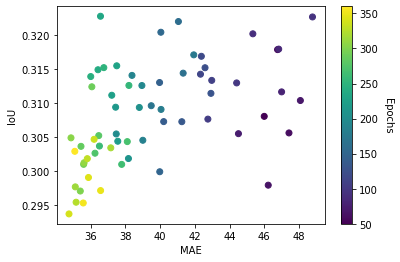

In [17]:
plt.scatter(kk["mae"], kk["iou"], c=kk["e"].astype(int));
plt.xlabel("MAE");
plt.ylabel("IoU");
cbar = plt.colorbar();
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Epochs', rotation=270);

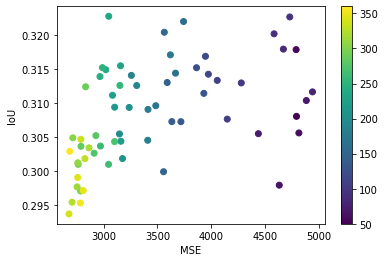

In [13]:
plt.scatter(kk["mse"], kk["iou"], c=kk["e"].astype(int));
plt.xlabel("MSE");
plt.ylabel("IoU");
plt.colorbar();

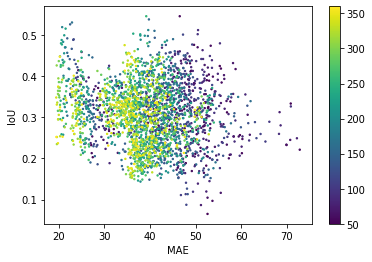

In [14]:
plt.scatter(k["mae"], k["iou"],c=k["e"],s=2);
plt.xlabel("MAE");
plt.ylabel("IoU");
plt.colorbar();

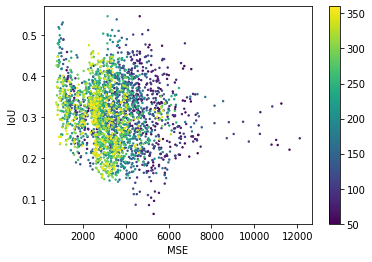

In [15]:
plt.scatter(k["mse"], k["iou"],c=k["e"],s=2);
plt.xlabel("MSE");
plt.ylabel("IoU");
plt.colorbar();

In [45]:
!ls /scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-3-ae-test4* | head

ls: cannot access /scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-3-ae-test4*: No such file or directory


In [48]:
ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-3-ae*test*-e{}.pt".format(100)
#ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae*test2-elastic-e{}.pt".format(e)
glob.glob(ae_file)

['/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-3-ae-test2-e100.pt']

In [95]:
toplot = glob.glob("/scratch/users/joecohen/output/*-*-ae*test*metr*")
toplot

['/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test3_elastic-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet151-4-ae-test2-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-ae-test2-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-elastic-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-convae4-ae-test2-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet50-3-ae-test2-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet50-2-ae-test2-elastic-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet151-2-ae_test3-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test3-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-convae2-ae-test2-metrics.pkl',
 '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet50-ae-test2-metrics.pkl',
 '/scratch/users/joec

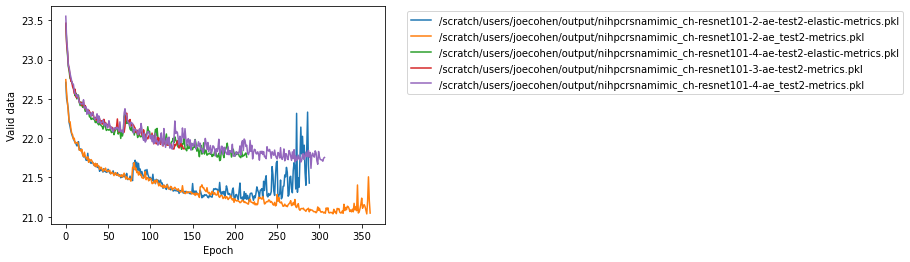

In [54]:
font = {'size'   : 10}
plt.rc('font', **font)

for to in toplot:
    results = pickle.load(open(to,"rb"))
    validauc = [np.log(-r["validauc"]) for r in results]
    plt.plot(validauc, label=to);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.ylabel("Valid data");
plt.xlabel("Epoch");

In [75]:
for_eval

['Cardiomegaly', 'Mass', 'Nodule', 'Atelectasis', 'Effusion', 'Lung Opacity']

In [57]:
target = "Cardiomegaly"
k = pd.DataFrame()
for e in range(50,400,50):
    ae_file_path = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-*-ae*test2-e{}.pt".format(e)
    #ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae*test2-elastic-e{}.pt".format(e)
    for ae_file in glob.glob(ae_file_path):
        if ("resnet101" in ae_file) or ("convae" in ae_file):
            print(ae_file)
            try:
                ae = torch.load(ae_file, map_location=torch.device('cuda'))#.cuda()
            except:
                print("Cannot load")
                continue
            z = ae.encode(torch.ones([1,1,224,224]).cuda())
            bottleneck = z.flatten().shape[0]
            print(bottleneck)
            a = attribution.run_eval(target, dmerge, model, ae, limit = 10, to_eval=["latentshift-max"], compute_recon=True)
            a["e"] = e
            a["bottleneck"] = bottleneck
            a["model"] = os.path.basename(ae_file)
            k = k.append(a)
            print(e)

fname = "iou-bottleneck-{}.pkl".format(target)
print(fname)
pickle.dump(k, open(fname, "bw"))

/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-4-ae-test2-e50.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-ae-test2-e50.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e50.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-convae-ae-test2-e50.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-3-ae-test2-e50.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-4-ae_test2-e100.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-ae-test2-e100.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e100.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-3-ae-test2-e100.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-convae-ae-test2-e100.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e150.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-ae-test2-e150.pt
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-4-ae_test2-e150.pt
/scratc

In [60]:
k = pickle.load(open("iou-bottleneck-Cardiomegaly.pkl", "rb"))
kk = k.groupby(["bottleneck","e"]).mean().reset_index()

In [49]:
#k = k[k.model.str.contains("elastic")]

In [50]:
#kk = k.groupby(["bottleneck","e"]).mean().reset_index()

In [51]:
#kk

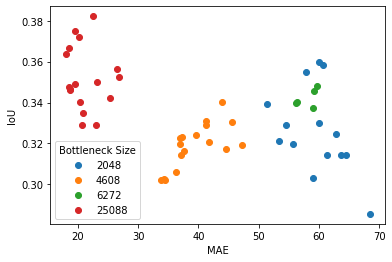

In [52]:
for bn in kk["bottleneck"].unique():
    kl = kk[kk.bottleneck == bn]
    plt.scatter(kl["mae"], kl["iou"], label=bn);
    
plt.xlabel("MAE");
plt.ylabel("IoU");
plt.legend(title="Bottleneck Size");

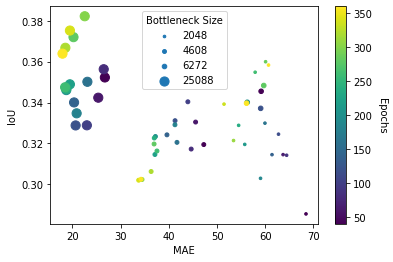

In [53]:
for bn in kk["bottleneck"].unique():
    kl = kk[kk.bottleneck == bn]
    plt.scatter(kl["mae"], kl["iou"],label=bn, s=bn/300, c=kl["e"]);
    
plt.xlabel("MAE");
plt.ylabel("IoU");
plt.legend(title="Bottleneck Size");
cbar = plt.colorbar();
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Epochs', rotation=270);

In [62]:
kk.loc[kk.groupby(["bottleneck"])["iou"].idxmax()]

,bottleneck,e,iou,precision,recall,mse,mae,idx
10,2048,240,0.359956,0.524678,0.524673,6791.523504,60.072633,5440.363636
17,4608,100,0.340371,0.503738,0.503738,4185.583047,43.951324,5440.363636
34,6272,100,0.348332,0.513503,0.513503,6992.187944,59.692257,5440.363636
49,25088,300,0.382196,0.551906,0.551906,1103.914004,22.566919,5440.363636


In [73]:
target = "Effusion"
label = 1
#dwhere = np.where((dmerge.labels[:,dmerge.pathologies.index(target)]  == label))[0]
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
dwhere[:10]

array([ 528,  882, 1918, 2030, 2887, 3089, 3528, 4616, 6487, 6990])

In [82]:
print(target)
idx = 8
sample = dmerge[dwhere[idx]]
csv = dmerge.csv.iloc[[dwhere[idx]]]
image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()

Effusion


[0.6935346] -20 2
0
10
20
module load ffmpeg;ffmpeg -loglevel quiet -stats -y -i /lscratch/joecohen/SDS-2342-ASDAA/image-%d-a.png -c:v libx264 -profile:v baseline -level 3.0 -pix_fmt yuv420p 'test.mp4'


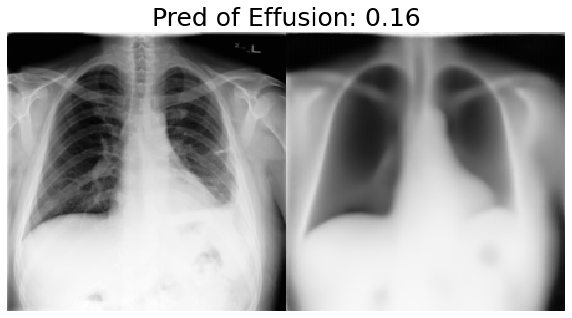

In [84]:
temp_path = "/lscratch/joecohen/SDS-2342-ASDAA"
attribution.generate_video(image, model, target, ae, temp_path, target_filename="test", border=True, show=True)

tensor([0.8052])
image
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-ae-test2-e300.pt
25088
[0.6503088] -40 1
/scratch/users/joecohen/output/nihpcrsnamimic_ch-convae-ae-test2-e100.pt
6272
[0.6658312] -30 1
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-elastic-e100.pt
4608
[0.7133899] -20 3
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-4-ae_test2-e250.pt
2048
[0.6935346] -20 2


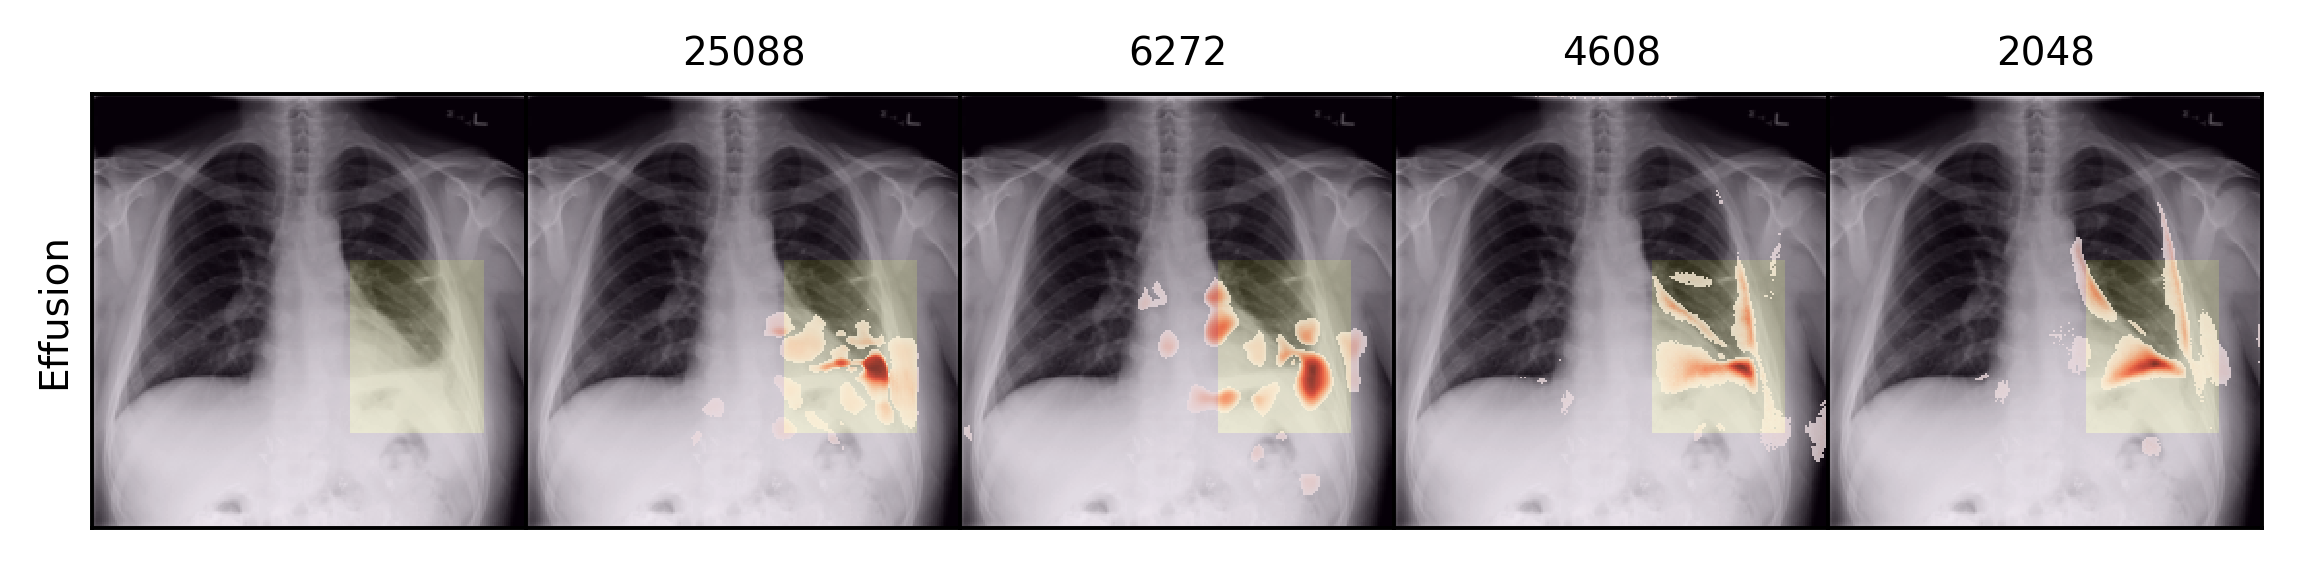

In [83]:
p = model(image)[:,model.pathologies.index(target)].detach().cpu()
print(p)
toplot = ["image", 
          "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-ae-test2-e300.pt", #25
          "/scratch/users/joecohen/output/nihpcrsnamimic_ch-convae-ae-test2-e100.pt", # 6
          "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-elastic-e100.pt", #4
          "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-4-ae_test2-e250.pt", #2048
         ]
          
fig, ax = plt.subplots(1,len(toplot), figsize=(8,3), dpi=350)
for i, method in enumerate(toplot):
    print(method)
    if method == "image":
        ax[i].imshow(image.detach().cpu()[0][0], interpolation='none', cmap="gray")
        ax[i].set_ylabel(target, fontsize=8)
    else:
        ae = torch.load(method, map_location=torch.device('cuda'))
        z = ae.encode(torch.ones([1,1,224,224]).cuda())
        bottleneck = z.flatten().shape[0]
        print(bottleneck)
        ax[i].set_title(bottleneck, fontsize=8)
          
        dimage = attribution.compute_attribution(image, "latentshift-max", model, target, ae=ae, threshold=True)
        ax[i].imshow(image.detach().cpu()[0][0], interpolation='none', cmap="gray")
        dimage[dimage==0] = np.nan
        ax[i].imshow(dimage, interpolation='none', alpha=0.8, cmap="Reds");
    try:
        ax[i].imshow(sample["pathology_masks"][dmerge.pathologies.index(target)][0], interpolation='none', alpha=0.1);
    except:
        pass
    ax[i].get_xaxis().set_visible(False)
    ax[i].set_yticks([])
    #ax[i].get_yaxis().set_visible(False)
    
fig.subplots_adjust(wspace=0, hspace=0);